In [32]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


In [2]:
train_data=pd.read_csv('/kaggle/input/titanic/train.csv')
test_data=pd.read_csv('/kaggle/input/titanic/test.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


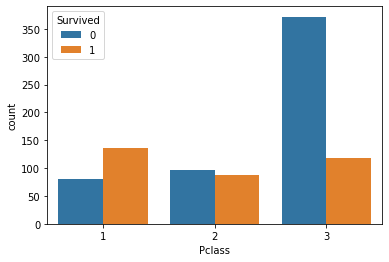

In [3]:
import seaborn as sns
sns.countplot(x='Pclass',hue='Survived',data=train_data)

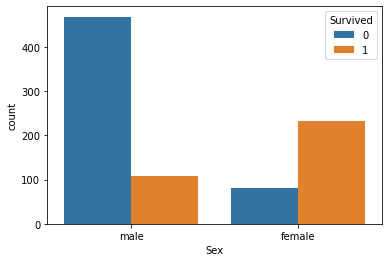

In [4]:
sns.countplot(x='Sex',hue='Survived',data=train_data)

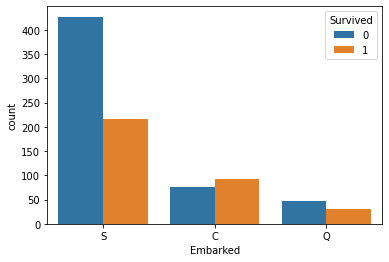

In [5]:
sns.countplot(x='Embarked',hue='Survived',data=train_data)

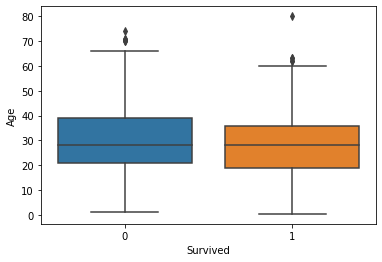

In [6]:
sns.boxplot(x='Survived',y='Age',data=train_data)

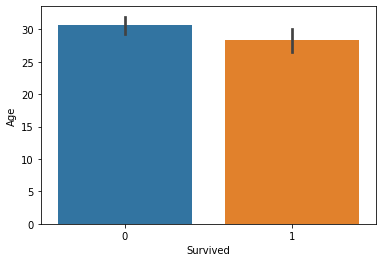

In [7]:
sns.barplot(x='Survived',y='Age',data=train_data)

In [33]:
sns.distplot(train_data['Survived'])

NameError: name 'data' is not defined

In [8]:
train_data.drop(['Name','Age','Ticket','Fare','Cabin','Embarked'],axis=1,inplace=True)

In [9]:
train_data['Sex']=train_data['Sex'].map({'male':0,'female':1})

In [10]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch
0,1,0,3,0,1,0
1,2,1,1,1,1,0
2,3,1,3,1,0,0
3,4,1,1,1,1,0
4,5,0,3,0,0,0


In [11]:

X=train_data.drop(['PassengerId','Survived'],axis=1)
y=train_data.iloc[:,1]

In [12]:
X

,Pclass,Sex,SibSp,Parch
0,3,0,1,0
1,1,1,1,0
2,3,1,0,0
3,1,1,1,0
4,3,0,0,0
...,...,...,...,...
886,2,0,0,0
887,1,1,0,0
888,3,1,1,2
889,1,0,0,0


In [13]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [16]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()

In [17]:
classifier.fit(X_train,y_train)

LogisticRegression()

In [18]:
y_pred=classifier.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0])

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100

79.88826815642457

In [20]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       110
           1       0.76      0.70      0.73        69

    accuracy                           0.80       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.80      0.80      0.80       179

[[95 15]
 [21 48]]


In [21]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [22]:
test_data.drop(['Name','Age','Ticket','Fare','Cabin','Embarked'],axis=1,inplace=True)

In [23]:
test_data['Sex']=test_data['Sex'].map({'male':0,'female':1})

In [24]:
test_data.head()

,PassengerId,Pclass,Sex,SibSp,Parch
0,892,3,0,0,0
1,893,3,1,1,0
2,894,2,0,0,0
3,895,3,0,0,0
4,896,3,1,1,1


In [25]:
PassengerId=test_data['PassengerId']
test_data=scaler.fit_transform(test_data.drop(['PassengerId'],axis=1))

In [26]:
test=pd.DataFrame(test_data)
test

,0,1,2,3
0,0.873482,-0.755929,-0.499470,-0.400248
1,0.873482,1.322876,0.616992,-0.400248
2,-0.315819,-0.755929,-0.499470,-0.400248
3,0.873482,-0.755929,-0.499470,-0.400248
4,0.873482,1.322876,0.616992,0.619896
...,...,...,...,...
413,0.873482,-0.755929,-0.499470,-0.400248
414,-1.505120,1.322876,-0.499470,-0.400248
415,0.873482,-0.755929,-0.499470,-0.400248
416,0.873482,-0.755929,-0.499470,-0.400248


In [27]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression()

In [28]:
test_pred=classifier.predict(test)
test_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [29]:
submission=pd.DataFrame({'PassengerId':PassengerId,'Survived':test_pred})

In [30]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [31]:
submission.to_csv('submission',index=False)